In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np
import matplotlib.pyplot as plt

C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\malaya_boilerplate\frozen_graph.py:35: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(
C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\malaya_boilerplate\frozen_graph.py:38: UserWarning: check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
  warnings.warn(


In [2]:
model_conformer = malaya_speech.speaker_vector.deep_model('conformer-base')
model_vggvox2 = malaya_speech.speaker_vector.deep_model('vggvox-v2')

C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\malaya_speech\utils\featurization.py:38: FutureWarning: Pass sr=16000, n_fft=512 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  self.mel_basis = librosa.filters.mel(


In [3]:
y, sr = malaya_speech.load('naber.wav')
len(y), sr

(342698, 16000)

In [4]:
vad = malaya_speech.vad.deep_model(model = 'vggvox-v2')

In [5]:
frames = list(malaya_speech.utils.generator.frames(y, 30, sr))

In [6]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

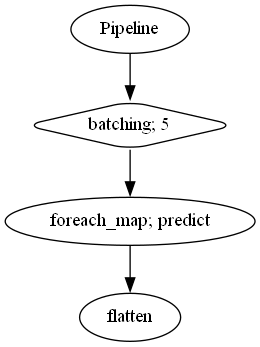

In [7]:
p = Pipeline()
pipeline = (
    p.batching(5)
    .foreach_map(vad.predict)
    .flatten()
)
p.visualize()

In [8]:
result = p(frames)
result.keys()

C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=512 is too small for input signal of length=480
  return f(*args, **kwargs)
C:\Users\serha\PycharmProjects\pythonProject\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=512 is too small for input signal of length=458
  return f(*args, **kwargs)


dict_keys(['batching', 'predict', 'flatten'])

In [9]:
frames_vad = [(frame, result['flatten'][no]) for no, frame in enumerate(frames)]
grouped_vad = malaya_speech.utils.group.group_frames(frames_vad)
grouped_vad = malaya_speech.utils.group.group_frames_threshold(grouped_vad, threshold_to_stop = 0.3)

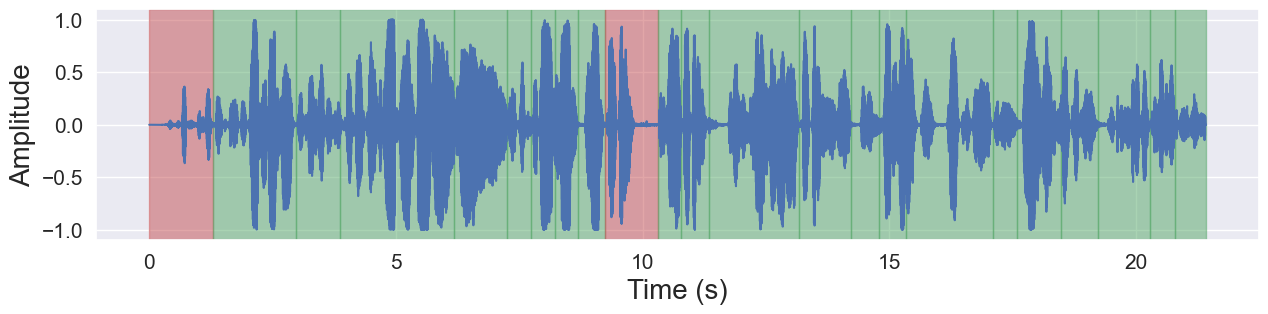

In [10]:
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr, figsize = (15, 3))

In [11]:
result_diarization_conformer = malaya_speech.diarization.speaker_similarity(grouped_vad, model_conformer)
result_diarization_conformer[:5]

[(<malaya_speech.model.frame.Frame at 0x2159e315900>, 'not a speaker'),
 (<malaya_speech.model.frame.Frame at 0x2159dfdd630>, 'speaker 0'),
 (<malaya_speech.model.frame.Frame at 0x215ad523490>, 'speaker 1'),
 (<malaya_speech.model.frame.Frame at 0x215ad523790>, 'speaker 2'),
 (<malaya_speech.model.frame.Frame at 0x215ad523550>, 'speaker 3')]

In [12]:
result_diarization_vggvox2 = malaya_speech.diarization.speaker_similarity(grouped_vad, model_vggvox2)
result_diarization_vggvox2[:5]

[(<malaya_speech.model.frame.Frame at 0x2159e315900>, 'not a speaker'),
 (<malaya_speech.model.frame.Frame at 0x2159dfdd630>, 'speaker 0'),
 (<malaya_speech.model.frame.Frame at 0x215ad523490>, 'speaker 1'),
 (<malaya_speech.model.frame.Frame at 0x215ad523790>, 'speaker 0'),
 (<malaya_speech.model.frame.Frame at 0x215ad523550>, 'speaker 2')]

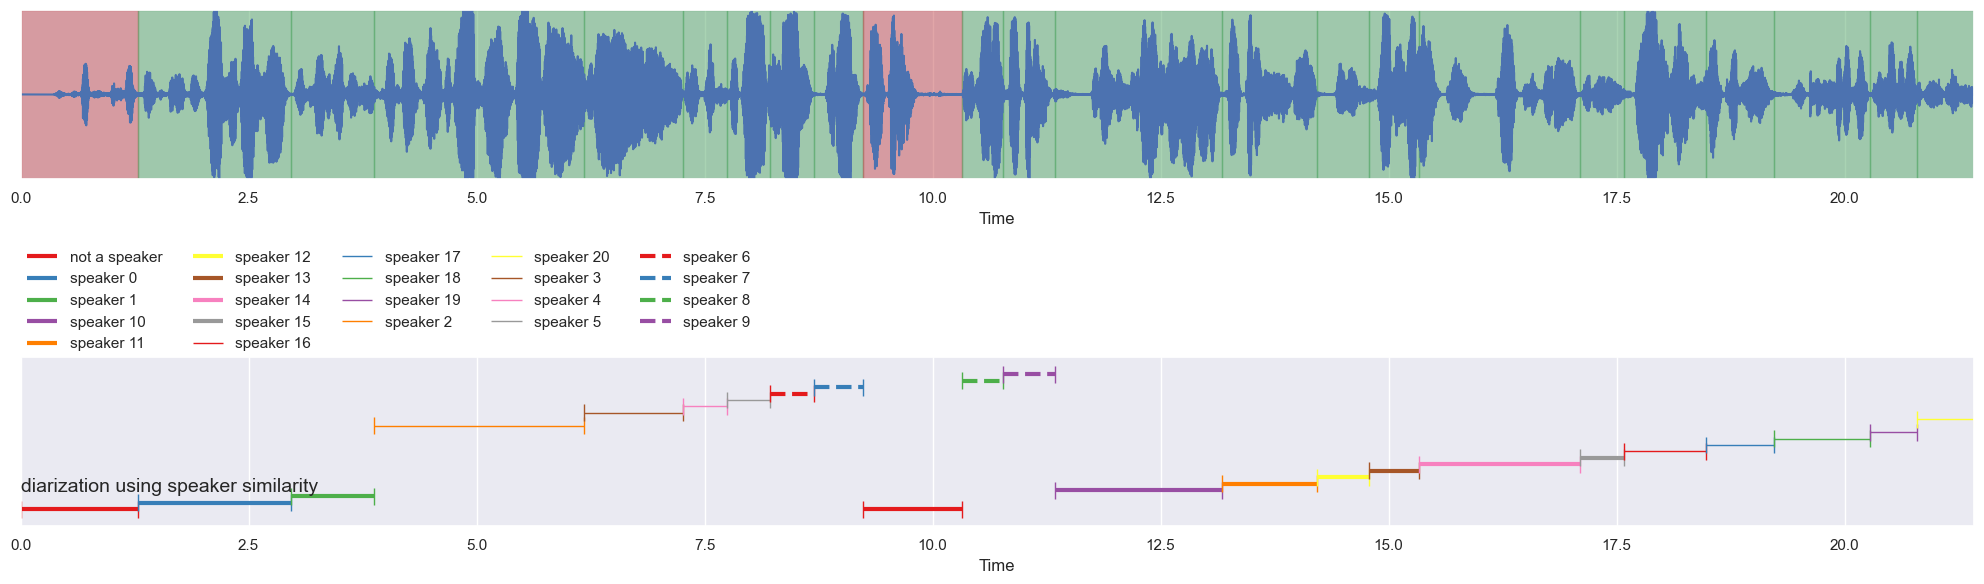

In [13]:
nrows = 2
fig, ax = plt.subplots(nrows = nrows, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 3)
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr, ax = ax[0])
malaya_speech.extra.visualization.plot_classification(result_diarization_conformer,
                                                      'diarization using speaker similarity', ax = ax[1],
                                                     x_text = 0.01)
fig.tight_layout()
plt.show()

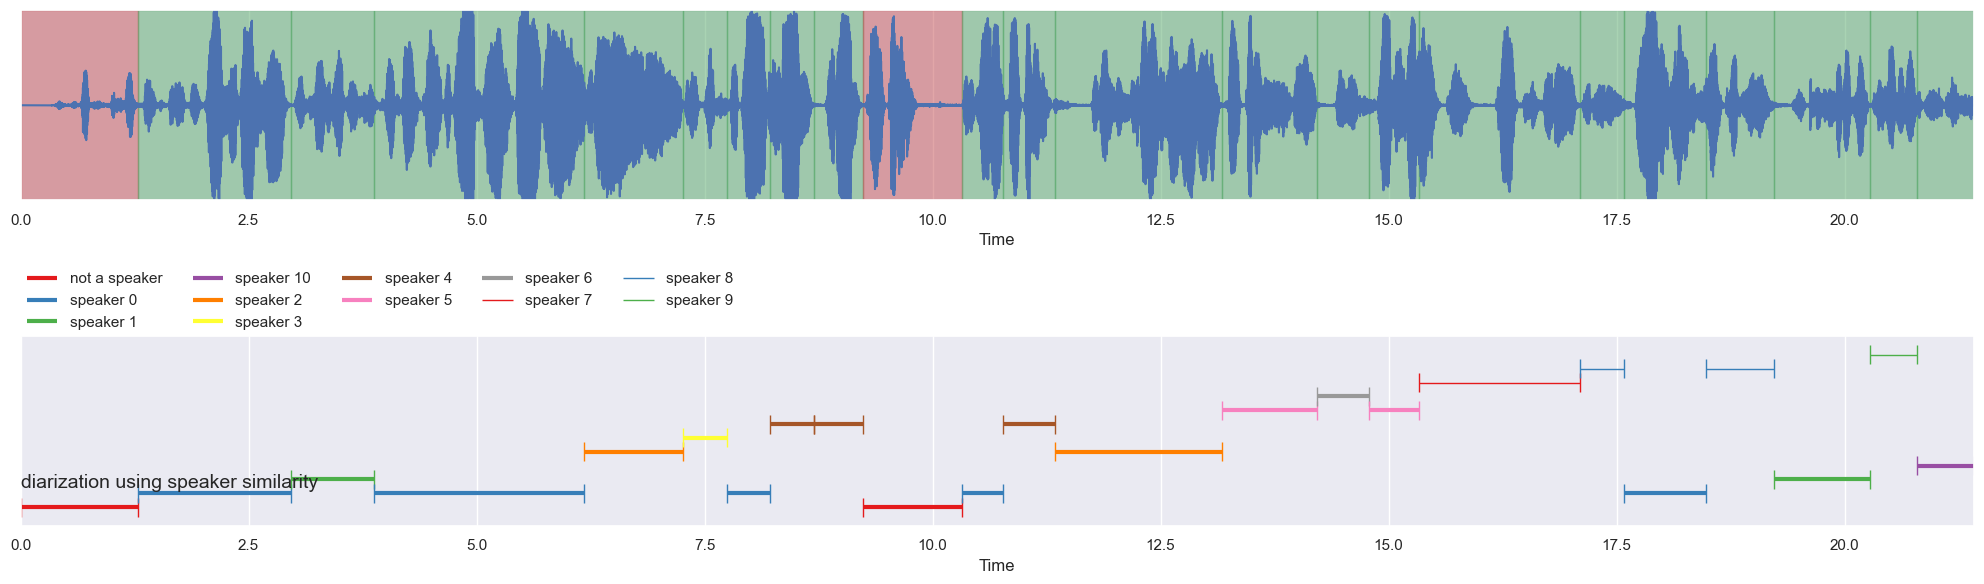

In [14]:
nrows = 2
fig, ax = plt.subplots(nrows = nrows, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 3)
malaya_speech.extra.visualization.visualize_vad(y, grouped_vad, sr, ax = ax[0])
malaya_speech.extra.visualization.plot_classification(result_diarization_vggvox2,
                                                      'diarization using speaker similarity', ax = ax[1],
                                                     x_text = 0.01)
fig.tight_layout()
plt.show()